# Speech Act Classification using Support Vector Machines 
Where the output is a single label

Generating the sentences and labels from the Excel sheet

In [84]:
import pandas as pd

In [85]:
raw_data = pd.read_csv("../data/original-labels.csv")

filtered_data = raw_data[raw_data["Label"] != "Other"]

In [86]:
sentences = filtered_data["Sentence"]
labels = filtered_data["Label"]

## Visualising the Data

In [87]:
filtered_data.head()

,Sentence,Label
0,i'm leaving now and where is foxtrot five at n...,Communications
1,charlie tuna said that direction how fast foun...,Rescue words
2,could we have a water tanker at,Fire words
3,charlie house empty going to holvern denston o...,Rescue words
4,this is charlie at yet as a handful of people ...,Reasoning words


Distribution of the data

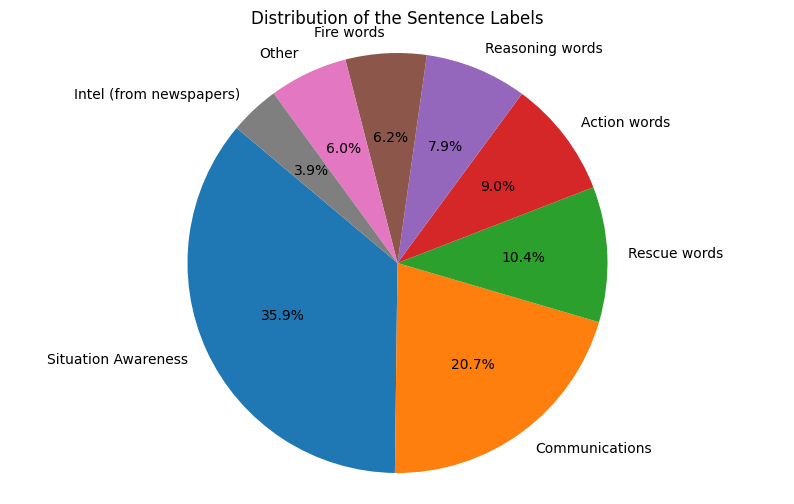

In [88]:
from matplotlib import pyplot as plt

label_counts = labels.value_counts()

plt.figure(figsize=(10, 6))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of the Sentence Labels")
plt.axis("equal")
plt.show()

## Preprocessing

Separating the data into training and test data

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=1)

Vectorising based on the Tf-idf values in the data set

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,
                             max_df=0.8,
                             sublinear_tf=True,
                             use_idf=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

Selecting the Linear Support Vector Classification model

In [91]:
from sklearn import svm

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_rbf = svm.SVC(kernel="rbf")
classifier_polynomial = svm.SVC(kernel="poly")
classifier_sigmoid = svm.SVC(kernel="sigmoid")

In [92]:
classifier_linear.fit(train_vectors, y_train)
classifier_rbf.fit(train_vectors, y_train)
classifier_polynomial.fit(train_vectors, y_train)
classifier_sigmoid.fit(train_vectors, y_train)

SVC(kernel='sigmoid')

Evaluating Results

In [93]:
prediction_linear = classifier_linear.predict(test_vectors)
prediction_rbf = classifier_rbf.predict(test_vectors)
prediction_polynomial = classifier_polynomial.predict(test_vectors)
prediction_sigmoid = classifier_sigmoid.predict(test_vectors)

In [94]:
from sklearn.metrics import classification_report, accuracy_score

# results
report = classification_report(y_test, prediction_linear, zero_division=0)
print("Classification Report: Original Single Label - Linear Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_linear):.2f}")
print(report)

Classification Report: Original Single Label - Linear Kernel
Accuracy: 0.51
                         precision    recall  f1-score   support

           Action words       0.39      0.18      0.25        61
         Communications       0.86      0.88      0.87       135
             Fire words       0.45      0.60      0.52        40
Intel (from newspapers)       0.24      0.21      0.22        19
                  Other       0.90      0.74      0.81        38
        Reasoning words       0.21      0.12      0.16        65
           Rescue words       0.22      0.22      0.22        63
    Situation Awareness       0.44      0.54      0.49       228

               accuracy                           0.51       649
              macro avg       0.46      0.44      0.44       649
           weighted avg       0.50      0.51      0.50       649


In [95]:
# results
report = classification_report(y_test, prediction_rbf, zero_division=0)
print("Classification Report: Original Single Label - RBF Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_rbf):.2f}")
print(report)

Classification Report: Original Single Label - RBF Kernel
Accuracy: 0.41
                         precision    recall  f1-score   support

           Action words       0.04      0.02      0.02        61
         Communications       0.84      0.81      0.83       135
             Fire words       0.43      0.47      0.45        40
Intel (from newspapers)       0.00      0.00      0.00        19
                  Other       0.86      0.16      0.27        38
        Reasoning words       0.00      0.00      0.00        65
           Rescue words       0.07      0.06      0.07        63
    Situation Awareness       0.36      0.55      0.43       228

               accuracy                           0.41       649
              macro avg       0.33      0.26      0.26       649
           weighted avg       0.39      0.41      0.38       649


In [96]:
# results
report = classification_report(y_test, prediction_polynomial, zero_division=0)
print("Classification Report: Original Single Label - Polynomial Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_polynomial):.2f}")
print(report)

Classification Report: Original Single Label - Polynomial Kernel
Accuracy: 0.25
                         precision    recall  f1-score   support

           Action words       0.00      0.00      0.00        61
         Communications       0.73      0.27      0.39       135
             Fire words       0.06      0.03      0.03        40
Intel (from newspapers)       0.00      0.00      0.00        19
                  Other       1.00      0.08      0.15        38
        Reasoning words       0.00      0.00      0.00        65
           Rescue words       0.00      0.00      0.00        63
    Situation Awareness       0.27      0.54      0.36       228

               accuracy                           0.25       649
              macro avg       0.26      0.11      0.12       649
           weighted avg       0.31      0.25      0.22       649


In [97]:
# results
report = classification_report(y_test, prediction_sigmoid, zero_division=0)
print("Classification Report: Original Single Label - Sigmoid Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_sigmoid):.2f}")
print(report)

Classification Report: Original Single Label - Sigmoid Kernel
Accuracy: 0.55
                         precision    recall  f1-score   support

           Action words       0.46      0.18      0.26        61
         Communications       0.87      0.86      0.86       135
             Fire words       0.50      0.65      0.57        40
Intel (from newspapers)       0.27      0.21      0.24        19
                  Other       0.90      0.74      0.81        38
        Reasoning words       0.28      0.14      0.19        65
           Rescue words       0.30      0.30      0.30        63
    Situation Awareness       0.48      0.62      0.54       228

               accuracy                           0.55       649
              macro avg       0.51      0.46      0.47       649
           weighted avg       0.54      0.55      0.53       649
